In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('../data/SERSIC/delight_multires_grizy.npy')
df = pd.read_csv("../data/SERSIC/df_coords_fix.csv")

In [3]:
suma = data.sum((1,2,3,4))
mask = (suma==0)

In [4]:
data = data[~mask]

In [5]:
df = df[~mask]

In [6]:
id_train = np.load("../data/SERSIC/id_train.npy", allow_pickle=True)
id_val = np.load("../data/SERSIC/id_validation.npy", allow_pickle=True)
id_test = np.load("../data/SERSIC/id_test.npy", allow_pickle=True)

In [7]:
mask_train = df['oid'].isin(id_train)
mask_val = df['oid'].isin(id_val)
mask_test = df['oid'].isin(id_test)

In [8]:
df_train = df[mask_train]
df_val = df[mask_val]
df_test = df[mask_test]

imgs_train = data[mask_train]
imgs_val = data[mask_val]
imgs_test = data[mask_test]

In [ ]:
df_train.to_csv("../data/SERSIC/df_train_delight.csv", index=False)
df_test.to_csv("../data/SERSIC/df_test_delight.csv", index=False)

In [12]:
pos_train = df_train[["dx","dy"]].values
pos_val = df_val[["dx","dy"]].values
pos_test = df_test[["dx","dy"]].values

In [13]:
np.savez(f'../data/SERSIC/train_delight.npz', imgs=imgs_train.astype(np.float32), pos=pos_train.astype(np.float32))
np.savez(f'../data/SERSIC/val_delight.npz', imgs=imgs_val.astype(np.float32), pos=pos_val.astype(np.float32))
np.savez(f'../data/SERSIC/test_delight.npz', imgs=imgs_test.astype(np.float32), pos=pos_test.astype(np.float32))

In [2]:
df_train = pd.read_csv("../data/SERSIC/df_train_delight.csv")

In [46]:
import numpy as np
import pandas as pd

# Definir bins y variable base
bins_radio = np.linspace(0, 80, 9)
x = df_train["rSerRadius"] * 3

# Asignar cada muestra a un bin
bin_indices = np.digitize(x, bins_radio, right=False)

# Calcular frecuencias por bin
counts, _ = np.histogram(x, bins=bins_radio)

# n = frecuencia del bin 60–70 (el penúltimo)
n_60_70 = counts[-2]

# Índices de los bins 60–70 y 70–80
idx_60_70 = np.where((x >= 60) & (x < 70))[0]
idx_70_80 = np.where((x >= 70) & (x < 80))[0]

# Inicializamos lista de DataFrames y conjunto de índices ya usados
df_list = []
used_indices = set()

for i in range(3):
    sampled_idx = []

    # Recorrer todos los bins menores a 60 → hasta bin que empieza en 60
    for b in range(1, len(bins_radio) - 2):  # excluye 60–70 y 70–80
        idx_bin = np.where(bin_indices == b)[0]
        idx_bin = [idx for idx in idx_bin if idx not in used_indices]
        if len(idx_bin) == 0:
            continue

        n_sample = min(len(idx_bin), n_60_70)
        if n_sample == 0:
            continue

        sampled = np.random.choice(idx_bin, size=n_sample, replace=False)
        sampled_idx.extend(sampled)
        used_indices.update(sampled)

    # Añadir todas las muestras de los bins 60–70 y 70–80 (>= 60)
    sampled_idx.extend(idx_60_70)
    sampled_idx.extend(idx_70_80)

    # Crear el DataFrame
    df_sub = df_train.iloc[sampled_idx].reset_index(drop=True)
    df_list.append(df_sub)

# Extraer los tres DataFrames
df1, df2, df3 = df_list

print(f"Frecuencia del bin 60–70: {n_60_70}")
print(f"Tamaños finales: {[len(df) for df in df_list]}")




Frecuencia del bin 60–70: 10
Tamaños finales: [73, 73, 66]


In [41]:
df1.to_csv("../data/SERSIC/df_train_delight_balanced_60-80_1.csv", index=False)
df2.to_csv("../data/SERSIC/df_train_delight_balanced_60-80_2.csv", index=False)
df3.to_csv("../data/SERSIC/df_train_delight_balanced_60-80_3.csv", index=False)

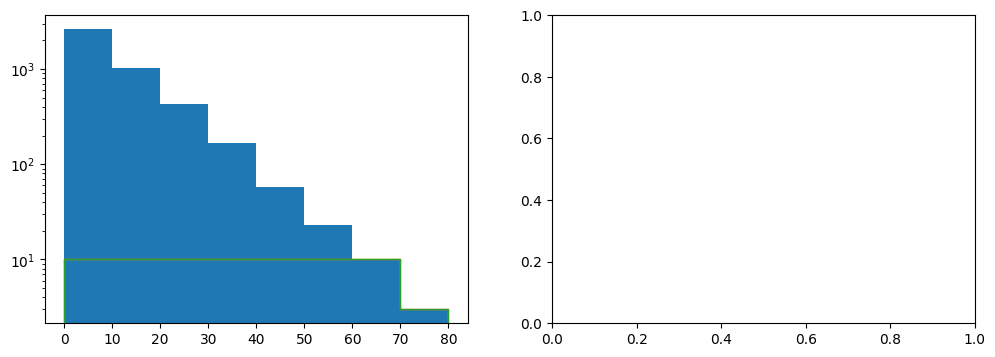

In [48]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

bins_radio = np.linspace(0,80,9)

axs[0].hist(df_train["rSerRadius"]*3, bins=bins_radio)
axs[0].hist(df_list[0]["rSerRadius"]*3, bins=bins_radio, histtype="step")
axs[0].hist(df_list[1]["rSerRadius"]*3, bins=bins_radio, histtype="step")
#axs[0].hist(df_list[2]["rSerRadius"]*3, bins=bins_radio, histtype="step")

axs[0].set_yscale("log")

In [42]:
import numpy as np
import pandas as pd

# Definir bins y variable base
bins_radio = np.linspace(0, 80, 9)
x = df_train["rSerRadius"] * 3

# Asignar cada muestra a un bin
bin_indices = np.digitize(x, bins_radio, right=False)

# Calcular frecuencias por bin
counts, _ = np.histogram(x, bins=bins_radio)

# n = frecuencia del bin 40–50 (índice 5 si bins = [0,10,20,30,40,50,60,70,80])
n_40_50 = counts[4]  # índice 4 → bin 40–50

# Índices de las muestras con rSerRadius*3 >= 40 (mantener todas)
idx_40_80 = np.where((x >= 40) & (x < 80))[0]

# Inicializar lista de DataFrames y conjunto de índices ya usados
df_list = []
used_indices = set()

for i in range(3):
    sampled_idx = []

    # Recorrer bins menores a 40 (0–10, 10–20, 20–30, 30–40)
    for b in range(1, 5):  # bins 1 a 4
        idx_bin = np.where(bin_indices == b)[0]
        idx_bin = [idx for idx in idx_bin if idx not in used_indices]
        if len(idx_bin) == 0:
            continue

        n_sample = min(len(idx_bin), n_40_50)
        if n_sample == 0:
            continue

        sampled = np.random.choice(idx_bin, size=n_sample, replace=False)
        sampled_idx.extend(sampled)
        used_indices.update(sampled)

    # Añadir todas las muestras de 40–80
    sampled_idx.extend(idx_40_80)

    # Crear DataFrame
    df_sub = df_train.iloc[sampled_idx].reset_index(drop=True)
    df_list.append(df_sub)

# Extraer los tres DataFrames
df1, df2, df3 = df_list

print(f"Frecuencia del bin 40–50: {n_40_50}")
print(f"Tamaños finales: {[len(df) for df in df_list]}")


Frecuencia del bin 40–50: 58
Tamaños finales: [326, 326, 320]


In [43]:
set1 = set(df1.oid)
set2 = set(df2.oid)
set3 = set(df3.oid)

print("df1 ∩ df2:", len(set1 & set2))
print("df1 ∩ df3:", len(set1 & set3))
print("df2 ∩ df3:", len(set2 & set3))

df1 ∩ df2: 94
df1 ∩ df3: 94
df2 ∩ df3: 94


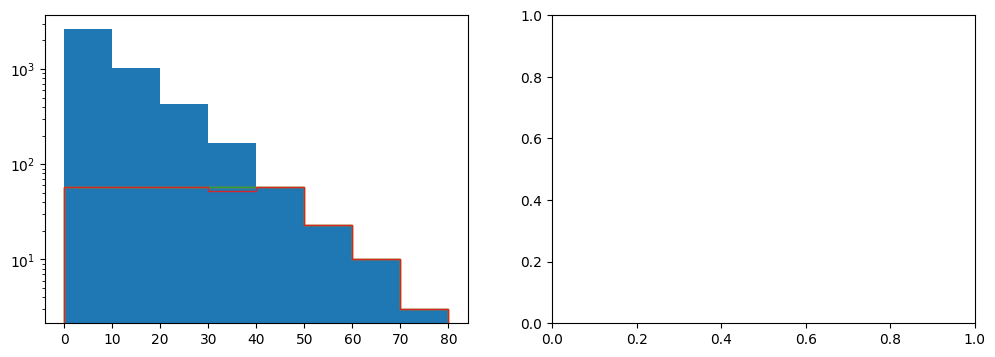

In [44]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

bins_radio = np.linspace(0,80,9)

axs[0].hist(df_train["rSerRadius"]*3, bins=bins_radio)
axs[0].hist(df_list[0]["rSerRadius"]*3, bins=bins_radio, histtype="step")
axs[0].hist(df_list[1]["rSerRadius"]*3, bins=bins_radio, histtype="step")
axs[0].hist(df_list[2]["rSerRadius"]*3, bins=bins_radio, histtype="step")

axs[0].set_yscale("log")

In [45]:
df1.to_csv("../data/SERSIC/df_train_delight_balanced_40-80_1.csv", index=False)
df2.to_csv("../data/SERSIC/df_train_delight_balanced_40-80_2.csv", index=False)
df3.to_csv("../data/SERSIC/df_train_delight_balanced_40-80_3.csv", index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import sys
import os
from joblib import Parallel, delayed

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.sersic_functions import sersic_profile, generate_random_pos
from utils.download_data.h2f_download_functions import get_galaxy_img

In [2]:
def augment_dataframe(data_frame, percentaje=0.01, n_jobs=-1):
    """
    Duplica filas de un DataFrame según el número de augmentaciones calculado
    con un perfil de Sérsic.
    """
    def compute_num_aug(row):
        sersic_img = sersic_profile(
            image_shape=(600, 600),
            x_center=299, y_center=299,
            Re_arcsec=row["rSerRadius"],
            b_over_a=row["rSerAb"],
            theta_deg=row["rSerPhi"],
            pixel_scale=0.25,
            Ie=1.0,
            n=4
        )
        n_pix = np.count_nonzero(sersic_img) * percentaje
        return int(np.ceil(n_pix))

    nums = Parallel(n_jobs=n_jobs)(
        delayed(compute_num_aug)(row) for _, row in data_frame.iterrows()
    )
    data_frame = data_frame.copy()
    data_frame["num_augmentations"] = nums

    data_frame_aug = data_frame.loc[
       data_frame.index.repeat(data_frame["num_augmentations"])
    ].reset_index(drop=True)

    return data_frame_aug

In [6]:
data_delight= np.load("/home/acontreras/PRISM/data/SERSIC/train_delight.npz")
pos_delight = data_delight["pos"]

data_aug1= np.load("/home/acontreras/PRISM/data/SERSIC/X_train_autolabeling_delight_1_percent_1.npz")
pos_aug1 = data_aug1["pos"]


data_60_80= np.load("/home/acontreras/PRISM/data/SERSIC/X_train_autolabeling_delight_balanced_60-80_1_percent_3.npz")
pos_60_80 = data_60_80["pos"]

In [9]:
dist_delight = np.linalg.norm(pos_delight, axis=1)
dist_aug1 = np.linalg.norm(pos_aug1, axis=1)
dist_60_80 = np.linalg.norm(pos_60_80, axis=1)

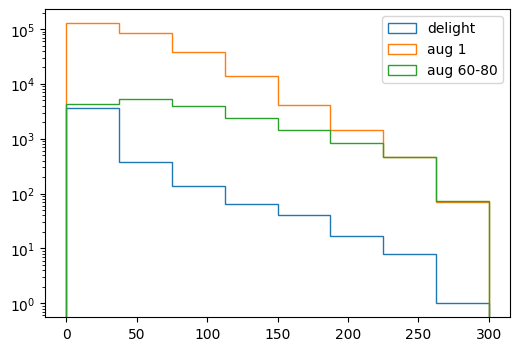

In [20]:
fig, axs = plt.subplots(1,1, figsize=(6,4))

bins_radio = np.linspace(0,300,9)

axs.hist(dist_delight, bins=bins_radio, histtype="step", label="delight")
axs.hist(dist_aug1, bins=bins_radio, histtype="step", label="aug 1")
axs.hist(dist_60_80, bins=bins_radio, histtype="step", label="aug 60-80")

axs.set_yscale("log")

axs.legend()
plt.show()

In [3]:
df = pd.read_csv("../data/SERSIC/df_train_delight_balanced_60-80_1.csv")
#df = pd.read_csv("../data/SERSIC/df_train_delight.csv")

In [60]:
df2 = augment_dataframe(df)

In [61]:
df2.shape

(25202, 121)

In [55]:
df2.shape

(77912, 121)

## Pasquet

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("../data/SERSIC/df_pasquet_sersic.csv")

In [30]:

def stratified_split_no_sklearn(df, col="z", bins=10, train_frac=0.6, val_frac=0.2, test_frac=0.2, random_state=48):
    """
    Split estratificado sin sklearn, usando histogramas con `bins` intervalos.
    """
    np.random.seed(random_state)
    assert np.isclose(train_frac + val_frac + test_frac, 1.0), "Las fracciones deben sumar 1."

    # --- 1️⃣ Crear bins ---
    bin_edges = np.histogram_bin_edges(df[col], bins=bins)
    df = df.copy()
    df["_bin"] = np.digitize(df[col], bin_edges, right=False) - 1
    df["_bin"] = np.clip(df["_bin"], 0, bins - 1)

    # --- 2️⃣ Inicializar listas ---
    train_parts, val_parts, test_parts = [], [], []

    # --- 3️⃣ Iterar por bin y dividir manualmente ---
    for _, group in df.groupby("_bin"):
        n = len(group)
        idx = np.random.permutation(group.index)
        
        n_train = int(n * train_frac)
        n_val = int(n * val_frac)
        n_test = n - n_train - n_val

        train_idx = idx[:n_train]
        val_idx = idx[n_train:n_train + n_val]
        test_idx = idx[n_train + n_val:]

        train_parts.append(group.loc[train_idx])
        val_parts.append(group.loc[val_idx])
        test_parts.append(group.loc[test_idx])

    # --- 4️⃣ Concatenar ---
    train_df = pd.concat(train_parts).drop(columns="_bin").reset_index(drop=True)
    val_df = pd.concat(val_parts).drop(columns="_bin").reset_index(drop=True)
    test_df = pd.concat(test_parts).drop(columns="_bin").reset_index(drop=True)

    return train_df, val_df, test_df

In [31]:
train, val, test = stratified_split_no_sklearn(df)

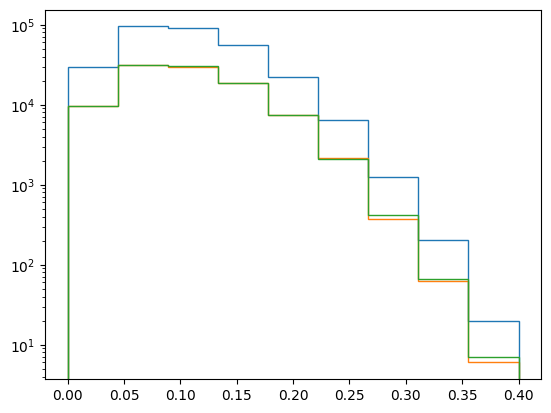

In [32]:
bins = np.linspace(0,0.4,10)
plt.hist(train["z"], bins=bins, histtype="step")
plt.hist(val["z"], bins=bins, histtype="step")
plt.hist(test["z"], bins=bins, histtype="step")

plt.yscale("log")
plt.show()

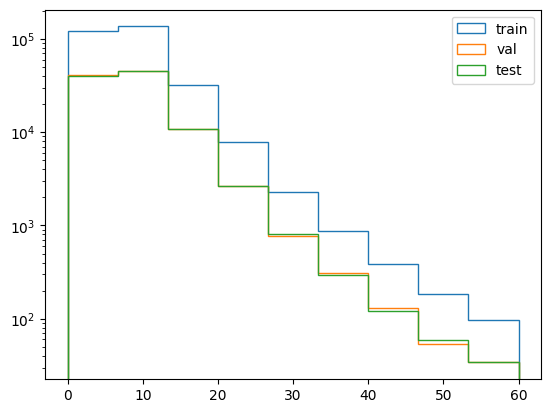

In [33]:
bins = np.linspace(0,60,10)
plt.hist(train["rSerRadius"]*3, bins=bins, histtype="step", label="train")
plt.hist(val["rSerRadius"]*3, bins=bins, histtype="step", label="val")
plt.hist(test["rSerRadius"]*3, bins=bins, histtype="step", label="test")

plt.yscale("log")
plt.legend()
plt.show()

In [34]:
train.shape

(301096, 9)

In [35]:
val.shape

(100362, 9)

In [36]:
test.shape

(100377, 9)

In [37]:
combined = pd.concat([
    train.assign(split="train"),
    val.assign(split="val"),
    test.assign(split="test")
])

duplicates = combined.duplicated(subset=df.columns, keep=False)

print("Filas repetidas totales:", duplicates.sum())

Filas repetidas totales: 0


In [22]:
train.to_csv("../data/SERSIC/df_pasquet_train.csv", index=False)
val.to_csv("../data/SERSIC/df_pasquet_val.csv", index=False)
test.to_csv("../data/SERSIC/df_pasquet_test.csv", index=False)